## 加载数据

In [1]:
import pandas as pd

# 1. 数据加载
data = pd.read_csv("chemicals.csv")
data

,molecular_weight,boiling_point,flash_point,solubility,is_safe
0,150.313556,105.714847,48.299300,29.414009,1
1,153.355080,100.437498,46.118624,22.044486,1
2,164.685986,106.712382,48.211274,27.428171,1
3,181.287954,117.936540,44.826857,21.127991,0
4,192.770577,94.299328,41.349604,29.271635,0
...,...,...,...,...,...
995,105.099364,111.358368,49.308773,22.704456,0
996,114.471676,119.910671,44.713095,26.371550,0
997,191.507562,90.397026,47.155076,25.109893,1
998,196.750542,117.248114,49.031010,25.220326,0


## 可视化原始数据

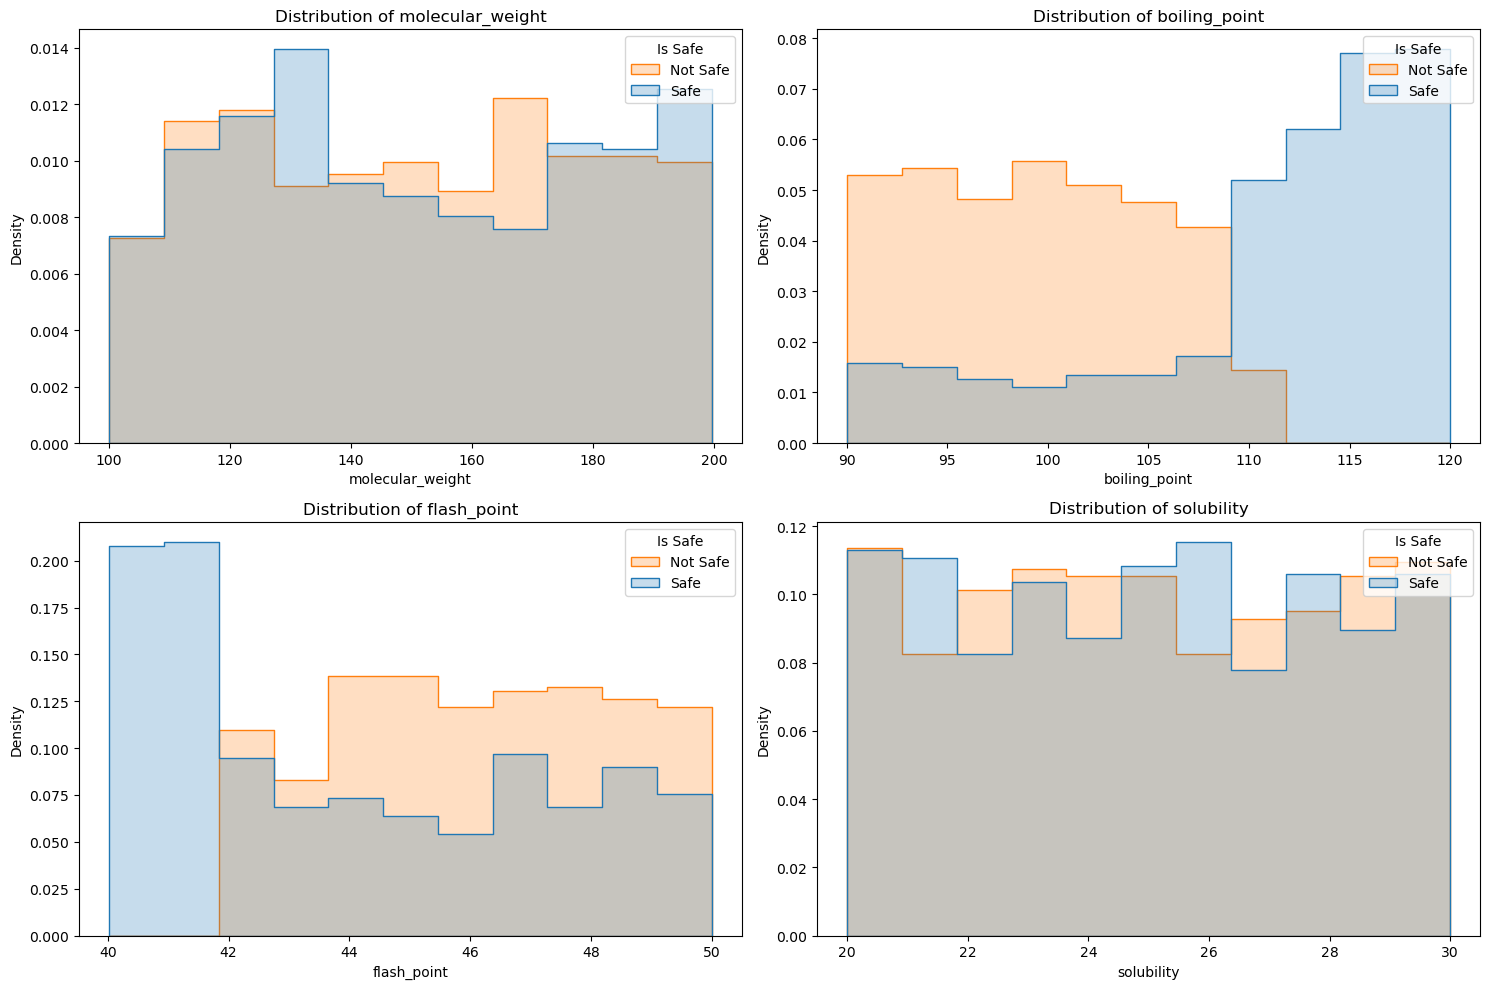

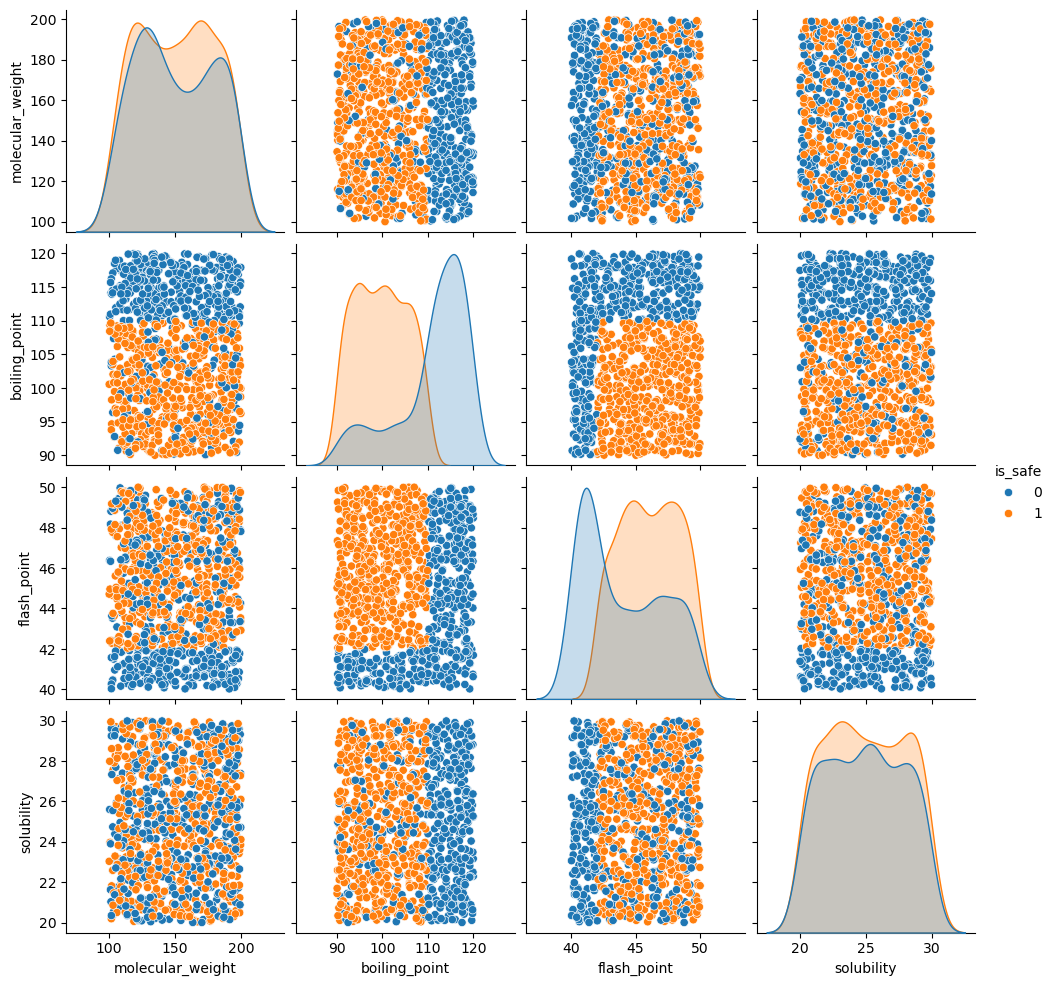

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# 1. 加载数据
data = pd.read_csv("chemicals.csv")

# 2. 可视化特性的分布
features = ["molecular_weight", "boiling_point", "flash_point", "solubility"]

plt.figure(figsize=(15, 10))

for i, feature in enumerate(features, 1):
    plt.subplot(2, 2, i)
    sns.histplot(data=data, x=feature, hue="is_safe", element="step", stat="density", common_norm=False)
    plt.title(f"Distribution of {feature}")
    plt.legend(title='Is Safe', labels=['Not Safe', 'Safe'])

plt.tight_layout()
plt.show()

# 3. 可视化特性之间的关系
sns.pairplot(data=data, hue="is_safe")
plt.show()


## 机器学习：逻辑回归、混淆矩阵、ROC曲线、模型评价报告、可视化测试集结果

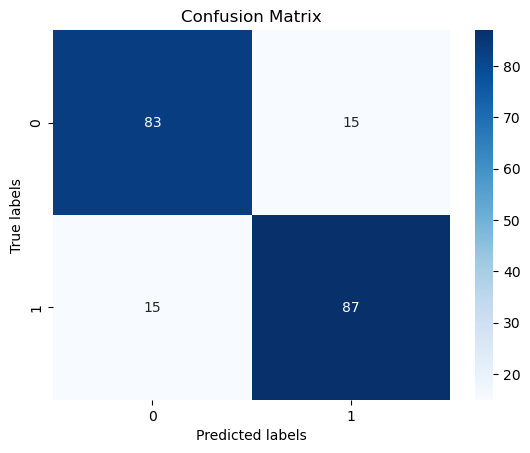

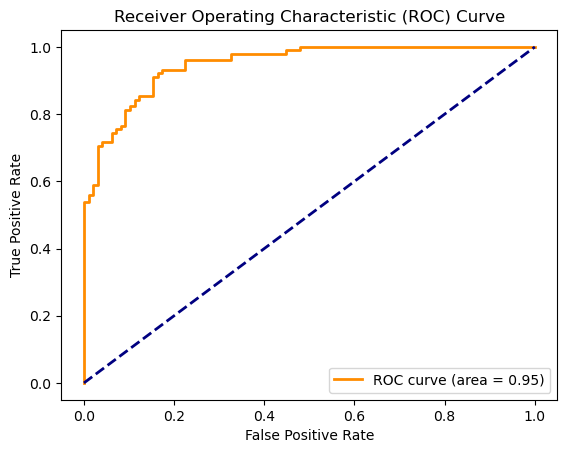

              precision    recall  f1-score   support

           0       0.85      0.85      0.85        98
           1       0.85      0.85      0.85       102

    accuracy                           0.85       200
   macro avg       0.85      0.85      0.85       200
weighted avg       0.85      0.85      0.85       200



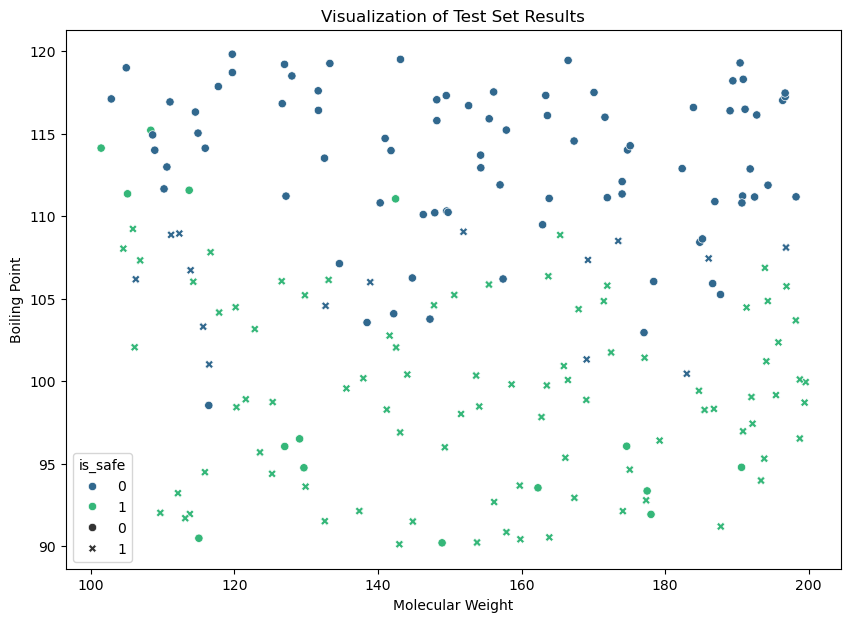

In [3]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc
import matplotlib.pyplot as plt
import seaborn as sns

# 1. 加载数据
data = pd.read_csv("chemicals.csv")
X = data.drop("is_safe", axis=1)
y = data["is_safe"]

# 2. 数据预处理
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 3. 模型训练
clf = LogisticRegression()
clf.fit(X_train_scaled, y_train)

# 4. 预测
y_pred = clf.predict(X_test_scaled)
y_pred_prob = clf.predict_proba(X_test_scaled)[:,1]  # 预测为类别1的概率

# 5. 模型评价
# 5.1 混淆矩阵
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='g', cmap='Blues')
plt.xlabel("Predicted labels")
plt.ylabel("True labels")
plt.title("Confusion Matrix")
plt.show()

# 5.2 ROC曲线
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
roc_auc = auc(fpr, tpr)
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

# 5.3 模型评价报告
print(classification_report(y_test, y_pred))

# 5.4 可视化测试集结果（以两个特性为例，例如molecular_weight和boiling_point）
plt.figure(figsize=(10, 7))
sns.scatterplot(x=X_test["molecular_weight"], y=X_test["boiling_point"], hue=y_pred, style=y_test, palette="viridis")
plt.xlabel("Molecular Weight")
plt.ylabel("Boiling Point")
plt.title("Visualization of Test Set Results")
plt.show()


## 机器学习：标注阈值

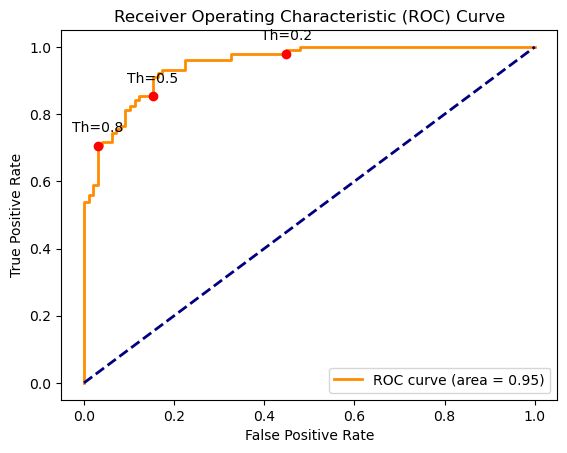

In [4]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# 1. 加载和预处理数据
data = pd.read_csv("chemicals.csv")
X = data.drop("is_safe", axis=1)
y = data["is_safe"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 2. 训练模型
clf = LogisticRegression()
clf.fit(X_train_scaled, y_train)

# 3. 预测概率
y_pred_prob = clf.predict_proba(X_test_scaled)[:, 1]

# 4. 计算ROC曲线
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
roc_auc = auc(fpr, tpr)

# 5. 绘制ROC曲线并标注特定阈值的点
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')

# 标注特定阈值的点
thresholds_to_mark = [0.2, 0.5, 0.8]
for th in thresholds_to_mark:
    idx = min(list(range(len(thresholds))), key=lambda i: abs(thresholds[i]-th))
    plt.plot(fpr[idx], tpr[idx], 'ro')
    plt.annotate(f'Th={th}', (fpr[idx], tpr[idx]), textcoords="offset points", xytext=(0,10), ha='center')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()
